In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

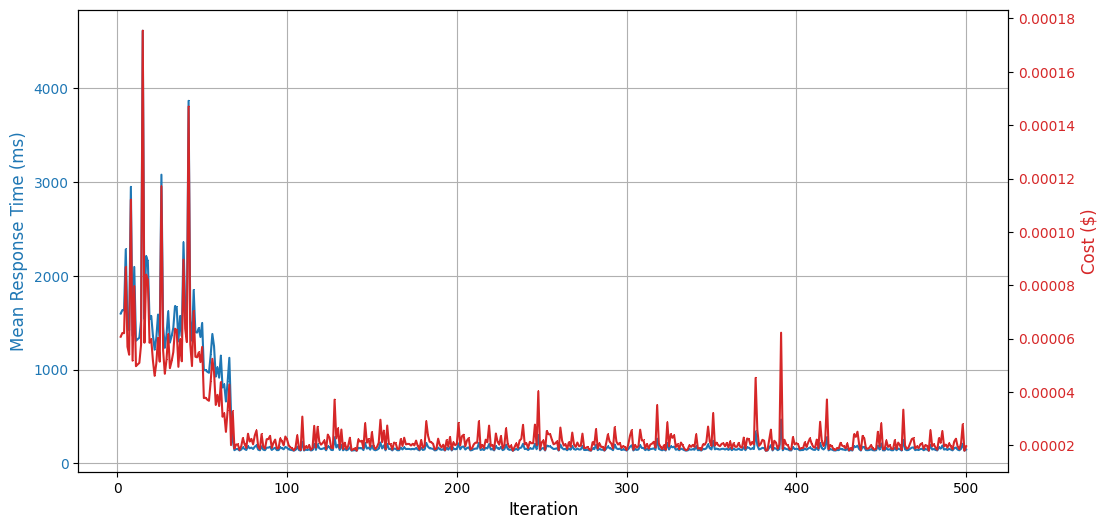

In [4]:
csv_files_auto = glob.glob("./data/auto/*response_times.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_auto]

combined_auto = pd.concat(dfs, axis=1)
combined_auto.columns = [f"run_{i + 1}" for i in range(len(dfs))]

combined_auto.head()

row_means = pd.DataFrame({
    "iteration": range(1, len(combined_auto) + 1),
    "mean_response_time": combined_auto.mean(axis=1).values
})

# remove first row (cold start) for better visualization
row_means = row_means.iloc[1:]
row_means["response_time_s"] = row_means["mean_response_time"] / 1000

# determine execution type
row_means["execution_type"] = row_means["response_time_s"].apply(
    lambda x: "cpu" if x > 0.5 else "gpu"
)

# assign rates
cpu_rate = 0.000038  # per second
gpu_rate = 0.000133  # per second

# calculate cost
row_means["cost"] = row_means.apply(
    lambda row: row["response_time_s"] * (cpu_rate if row["execution_type"] == "cpu" else gpu_rate),
    axis=1
)

# plot with iteration on x axis and mean_response_time on y axis
# First y-axis: response time
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(row_means["iteration"], row_means["mean_response_time"], color="tab:blue", marker=',')
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Mean Response Time (ms)", fontsize=12, color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

# Second y-axis: cost
ax2 = ax1.twinx()
ax2.plot(row_means["iteration"], row_means["cost"], color="tab:red", marker=',')
ax2.set_ylabel("Cost ($)", fontsize=12, color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.show()


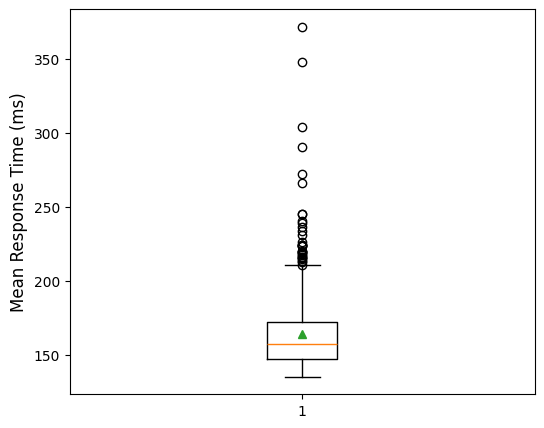

In [3]:
# GPU Boxplot
csv_files_gpu = glob.glob("./data/gpu/*response_times.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_gpu]

combined_gpu = pd.concat(dfs, axis=1)
combined_gpu.columns = [f"run_{i + 1}" for i in range(len(dfs))]

# Compute row means, skipping the first row (cold start)
row_means_without_coldstart_gpu = combined_gpu.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart_gpu, showmeans=True)

# plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

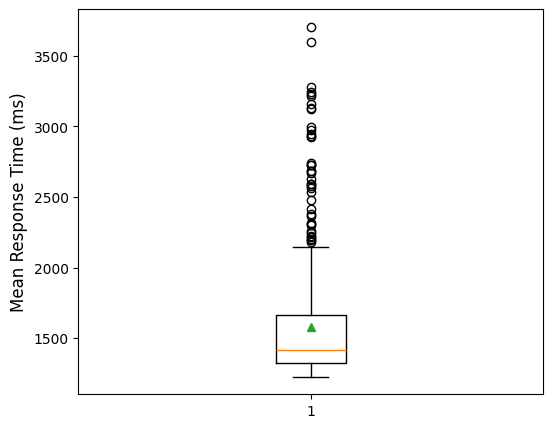

In [24]:
# CPU Boxplot
csv_files_cpu = glob.glob("./data/cpu/*response_times.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files_cpu]

combined_cpu = pd.concat(dfs, axis=1)
combined_cpu.columns = [f"run_{i + 1}" for i in range(len(dfs))]

combined_cpu.head()

# Compute row means, skipping the first row (cold start)
row_means_without_coldstart_cpu = combined_cpu.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart_cpu, showmeans=True)

# Add title and labels
# plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()


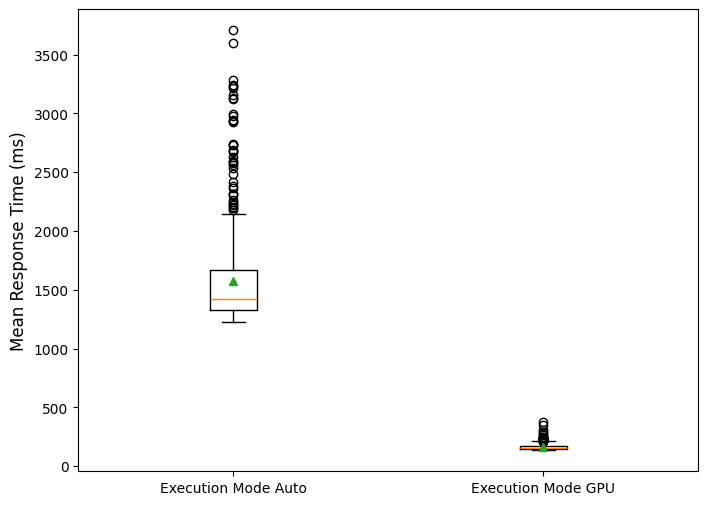

In [16]:
# Combine both CPU and GPU data for comparison

data = [row_means_without_coldstart_cpu, row_means_without_coldstart_gpu]

# Create the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(data, tick_labels=["Execution Mode CPU", "Execution Mode GPU"], showmeans=True)

# Add title and labels
# plt.title("Comparison of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

In [23]:
# Calculate and print summary statistics

# mean of first values
auto_coldstart = combined_auto.iloc[0].mean()
gpu_coldstart = combined_gpu.iloc[0].mean()
cpu_coldstart = combined_cpu.iloc[0].mean()


print(f"Auto Cold Start Mean: {auto_coldstart:.2f} ms")
print(f"GPU Cold Start Mean: {gpu_coldstart:.2f} ms")
print(f"CPU Cold Start Mean: {cpu_coldstart:.2f} ms")

Auto Cold Start Mean: 24471.46 ms
GPU Cold Start Mean: 31869.98 ms
CPU Cold Start Mean: 26523.70 ms
